In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HouseFinal.xlsx to HouseFinal (1).xlsx


# Loading the data after processing the GeoRecord of latitude and longitude

In [ ]:
dataset2 = pd.read_excel ("HouseFinal.xlsx")

Checking the head of dataframe

In [ ]:
dataset2.head()

,Index,title,final_price,bathrooms,parking,description,mls,type,full_link,full_address,new_bedroom,new_sqft,Location,Latitude,Longitude
0,1,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000.0,2.0,1.0,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto",3.0,800.0,"38, Grenville Street, Toronto Centre, Old Toro...",43.661667,-79.386005
1,2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000.0,1.0,0.0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto",1.0,500.0,"30, Roehampton Avenue, Toronto‚ÄîSt. Paul's, O...",43.708594,-79.397577
2,3,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000.0,1.0,1.0,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto",2.0,600.0,"65, East Liberty Street, Little Tibet, Spadina...",43.638151,-79.414077
3,4,"505 - 4 Elsinore Path, Toronto (W4517121) | Zo...",368000.0,1.0,1.0,Suite 505 Is An Immaculate Condo With The Most...,W4517121,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"4 Elsinore Path, Toronto",0.0,499.0,"Elsinore Path, Etobicoke‚ÄîLakeshore, Etobicok...",43.601591,-79.510395
4,5,"110 Albertus Ave, Toronto (C4467843) | Zoocasa",2700000.0,5.0,2.0,"Gorgeous Luxury Custom Built, 4 Bdrm Home On A...",C4467843,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"110 Albertus Ave, Toronto",4.0,2500.0,"110, Albertus Avenue, Eglinton‚ÄîLawrence, Old...",43.713951,-79.403311


In [ ]:
dataset2.isnull().sum()

Index             0
title           390
final_price     390
bathrooms       390
parking         390
description     412
mls             390
type            390
full_link       390
full_address    412
new_bedroom     390
new_sqft        390
Location        390
Latitude        390
Longitude       390
dtype: int64

There are still some null values that needs to processed

In [ ]:
dataset2.describe()

,Index,final_price,bathrooms,parking,new_bedroom,new_sqft,Latitude,Longitude
count,7944.000000,7.554000e+03,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000,7554.000000
mean,3972.500000,7.861215e+05,1.926397,1.332804,2.474451,1051.484644,43.726402,-79.001940
std,2293.379602,5.370057e+05,1.046583,5.212895,1.269444,614.636467,0.480588,5.837454
min,1.000000,1.030000e+05,1.000000,0.000000,0.000000,499.000000,40.461308,-80.600952
25%,1986.750000,4.950000e+05,1.000000,1.000000,2.000000,600.000000,43.647512,-79.448136
50%,3972.500000,6.250000e+05,2.000000,1.000000,2.000000,900.000000,43.685088,-79.396878
75%,5958.250000,8.500000e+05,2.000000,1.000000,3.000000,1200.000000,43.758981,-79.357157
max,7944.000000,6.500000e+06,14.000000,334.000000,12.000000,4250.000000,54.660979,11.048029


Describe the dataset

In [ ]:
dataset2.drop('Index', axis=1,inplace= True)

In [ ]:
dataset2.dropna()

,title,final_price,bathrooms,parking,description,mls,type,full_link,full_address,new_bedroom,new_sqft,Location,Latitude,Longitude
0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000.0,2.0,1.0,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto",3.0,800.0,"38, Grenville Street, Toronto Centre, Old Toro...",43.661667,-79.386005
1,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000.0,1.0,0.0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto",1.0,500.0,"30, Roehampton Avenue, Toronto‚ÄîSt. Paul's, O...",43.708594,-79.397577
2,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000.0,1.0,1.0,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto",2.0,600.0,"65, East Liberty Street, Little Tibet, Spadina...",43.638151,-79.414077
3,"505 - 4 Elsinore Path, Toronto (W4517121) | Zo...",368000.0,1.0,1.0,Suite 505 Is An Immaculate Condo With The Most...,W4517121,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"4 Elsinore Path, Toronto",0.0,499.0,"Elsinore Path, Etobicoke‚ÄîLakeshore, Etobicok...",43.601591,-79.510395
4,"110 Albertus Ave, Toronto (C4467843) | Zoocasa",2700000.0,5.0,2.0,"Gorgeous Luxury Custom Built, 4 Bdrm Home On A...",C4467843,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"110 Albertus Ave, Toronto",4.0,2500.0,"110, Albertus Avenue, Eglinton‚ÄîLawrence, Old...",43.713951,-79.403311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7939,"1404 - 14 York St, Toronto (C4380572) | Zoocasa",591000.0,1.0,0.0,"The Luxurious Ice Condo With Amazing Views, Lo...",C4380572,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"14 York St, Toronto",2.0,600.0,"Ice II, 14, York Street, Spadina‚ÄîFort York, ...",43.642037,-79.381615
7940,"1609 - 410 Mclevin Ave, Toronto (E4341059) | Z...",398000.0,2.0,1.0,High Demand Immaculate Luxury Corner Unit With...,E4341059,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"410 Mclevin Ave, Toronto",2.0,1200.0,"410, McLevin Avenue, Scarborough‚ÄîRouge Park,...",43.809479,-79.221507
7941,"1016 - 812 Lansdowne Ave, Toronto (W4379038) |...",440000.0,1.0,0.0,"Bright & Spacious One Br Condo, Highly Sought ...",W4379038,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"812 Lansdowne Ave, Toronto",1.0,500.0,"812, Lansdowne Avenue, Davenport, Old Toronto,...",43.665242,-79.446051
7942,"1110 - 1420 Dupont St, Toronto (W4380170) | Zo...",495000.0,1.0,1.0,A 2 Bedroom Corner Unit With Views Of The City...,W4380170,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"1420 Dupont St, Toronto",2.0,600.0,"1420, Dupont Street, Junction Triangle, Davenp...",43.666445,-79.448492


In [ ]:
dataset2.shape

(7944, 14)

In [ ]:
dataset2.isnull().sum()

title           390
final_price     390
bathrooms       390
parking         390
description     412
mls             390
type            390
full_link       390
full_address    412
new_bedroom     390
new_sqft        390
Location        390
Latitude        390
Longitude       390
dtype: int64

In [ ]:
dataset2.dropna(how='all', inplace=True)

In [ ]:
dataset2.isnull().sum()

title            0
final_price      0
bathrooms        0
parking          0
description     22
mls              0
type             0
full_link        0
full_address    22
new_bedroom      0
new_sqft         0
Location         0
Latitude         0
Longitude        0
dtype: int64

In [ ]:
import plotly.express as px


fig = px.scatter_geo(dataset2,lat='Latitude',lon='Longitude', hover_name="final_price")
fig.update_layout(title = 'S', title_x=0.5)
fig.show()

In [ ]:
dataset2.corr()

,final_price,bathrooms,parking,new_bedroom,new_sqft,Latitude,Longitude
final_price,1.000000,0.681617,0.073168,0.559005,0.766216,-0.032364,-0.015583
bathrooms,0.681617,1.000000,0.104376,0.772794,0.845409,-0.005793,-0.003764
parking,0.073168,0.104376,1.000000,0.110425,0.111263,-0.001206,-0.006189
new_bedroom,0.559005,0.772794,0.110425,1.000000,0.776900,-0.011441,-0.003166
new_sqft,0.766216,0.845409,0.111263,0.776900,1.000000,-0.010711,-0.014829
Latitude,-0.032364,-0.005793,-0.001206,-0.011441,-0.010711,1.000000,0.765431
Longitude,-0.015583,-0.003764,-0.006189,-0.003166,-0.014829,0.765431,1.000000


Checking the corelation between different data points

In [ ]:
dataset2['mls'].value_counts()

C4461599    1
W4411683    1
W4412199    1
W4421478    1
C4415391    1
           ..
C4446000    1
W4455943    1
W4460715    1
C4358826    1
N4371176    1
Name: mls, Length: 7554, dtype: int64

# Categorical data- column Type

There are various ways of dealing with categorical data, Here we are using One hot encoding.

In [ ]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [ ]:
type_array=one.fit_transform(dataset2[['type']]).toarray()

In [ ]:
one.categories_

[array(['Att/Row/Twnhouse', 'Co-Op Apt', 'Co-Ownership Apt',
        'Comm Element Condo', 'Condo Apt', 'Condo Townhouse', 'Det Condo',
        'Detached', 'Duplex', 'Fourplex', 'Leasehold Condo', 'Multiplex',
        'Semi-Detached', 'Triplex'], dtype=object)]

In [ ]:
type_labels = one.categories_

In [ ]:
type_labels = np.array(type_labels).ravel()

In [ ]:
print(type_labels)

['Att/Row/Twnhouse' 'Co-Op Apt' 'Co-Ownership Apt' 'Comm Element Condo'
 'Condo Apt' 'Condo Townhouse' 'Det Condo' 'Detached' 'Duplex' 'Fourplex'
 'Leasehold Condo' 'Multiplex' 'Semi-Detached' 'Triplex']




```
# This is formatted as code
```

After applying oneHot encoding data looks like this:

In [ ]:
pd.DataFrame(type_array, columns =type_labels )

,Att/Row/Twnhouse,Co-Op Apt,Co-Ownership Apt,Comm Element Condo,Condo Apt,Condo Townhouse,Det Condo,Detached,Duplex,Fourplex,Leasehold Condo,Multiplex,Semi-Detached,Triplex
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7549,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7550,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7551,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7552,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset2type = pd.DataFrame(type_array, columns =type_labels )

In [ ]:
datasetnew = pd.concat([dataset2, dataset2type], axis=1)

In [ ]:
datasetnew.shape

(7926, 28)

In [ ]:
datasetnew.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
datasetnew.isnull().sum()

title                 0
final_price           0
bathrooms             0
parking               0
description           0
mls                   0
type                  0
full_link             0
full_address          0
new_bedroom           0
new_sqft              0
Location              0
Latitude              0
Longitude             0
Att/Row/Twnhouse      0
Co-Op Apt             0
Co-Ownership Apt      0
Comm Element Condo    0
Condo Apt             0
Condo Townhouse       0
Det Condo             0
Detached              0
Duplex                0
Fourplex              0
Leasehold Condo       0
Multiplex             0
Semi-Detached         0
Triplex               0
dtype: int64

Now concating two data frames to process dataset new.

In [ ]:
datasetnew.head()

,title,final_price,bathrooms,parking,description,mls,type,full_link,full_address,new_bedroom,...,Condo Apt,Condo Townhouse,Det Condo,Detached,Duplex,Fourplex,Leasehold Condo,Multiplex,Semi-Detached,Triplex
0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000.0,2.0,1.0,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto",3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000.0,1.0,0.0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto",1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000.0,1.0,1.0,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto",2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"505 - 4 Elsinore Path, Toronto (W4517121) | Zo...",368000.0,1.0,1.0,Suite 505 Is An Immaculate Condo With The Most...,W4517121,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"4 Elsinore Path, Toronto",0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"110 Albertus Ave, Toronto (C4467843) | Zoocasa",2700000.0,5.0,2.0,"Gorgeous Luxury Custom Built, 4 Bdrm Home On A...",C4467843,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"110 Albertus Ave, Toronto",4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data visualization-pairplot

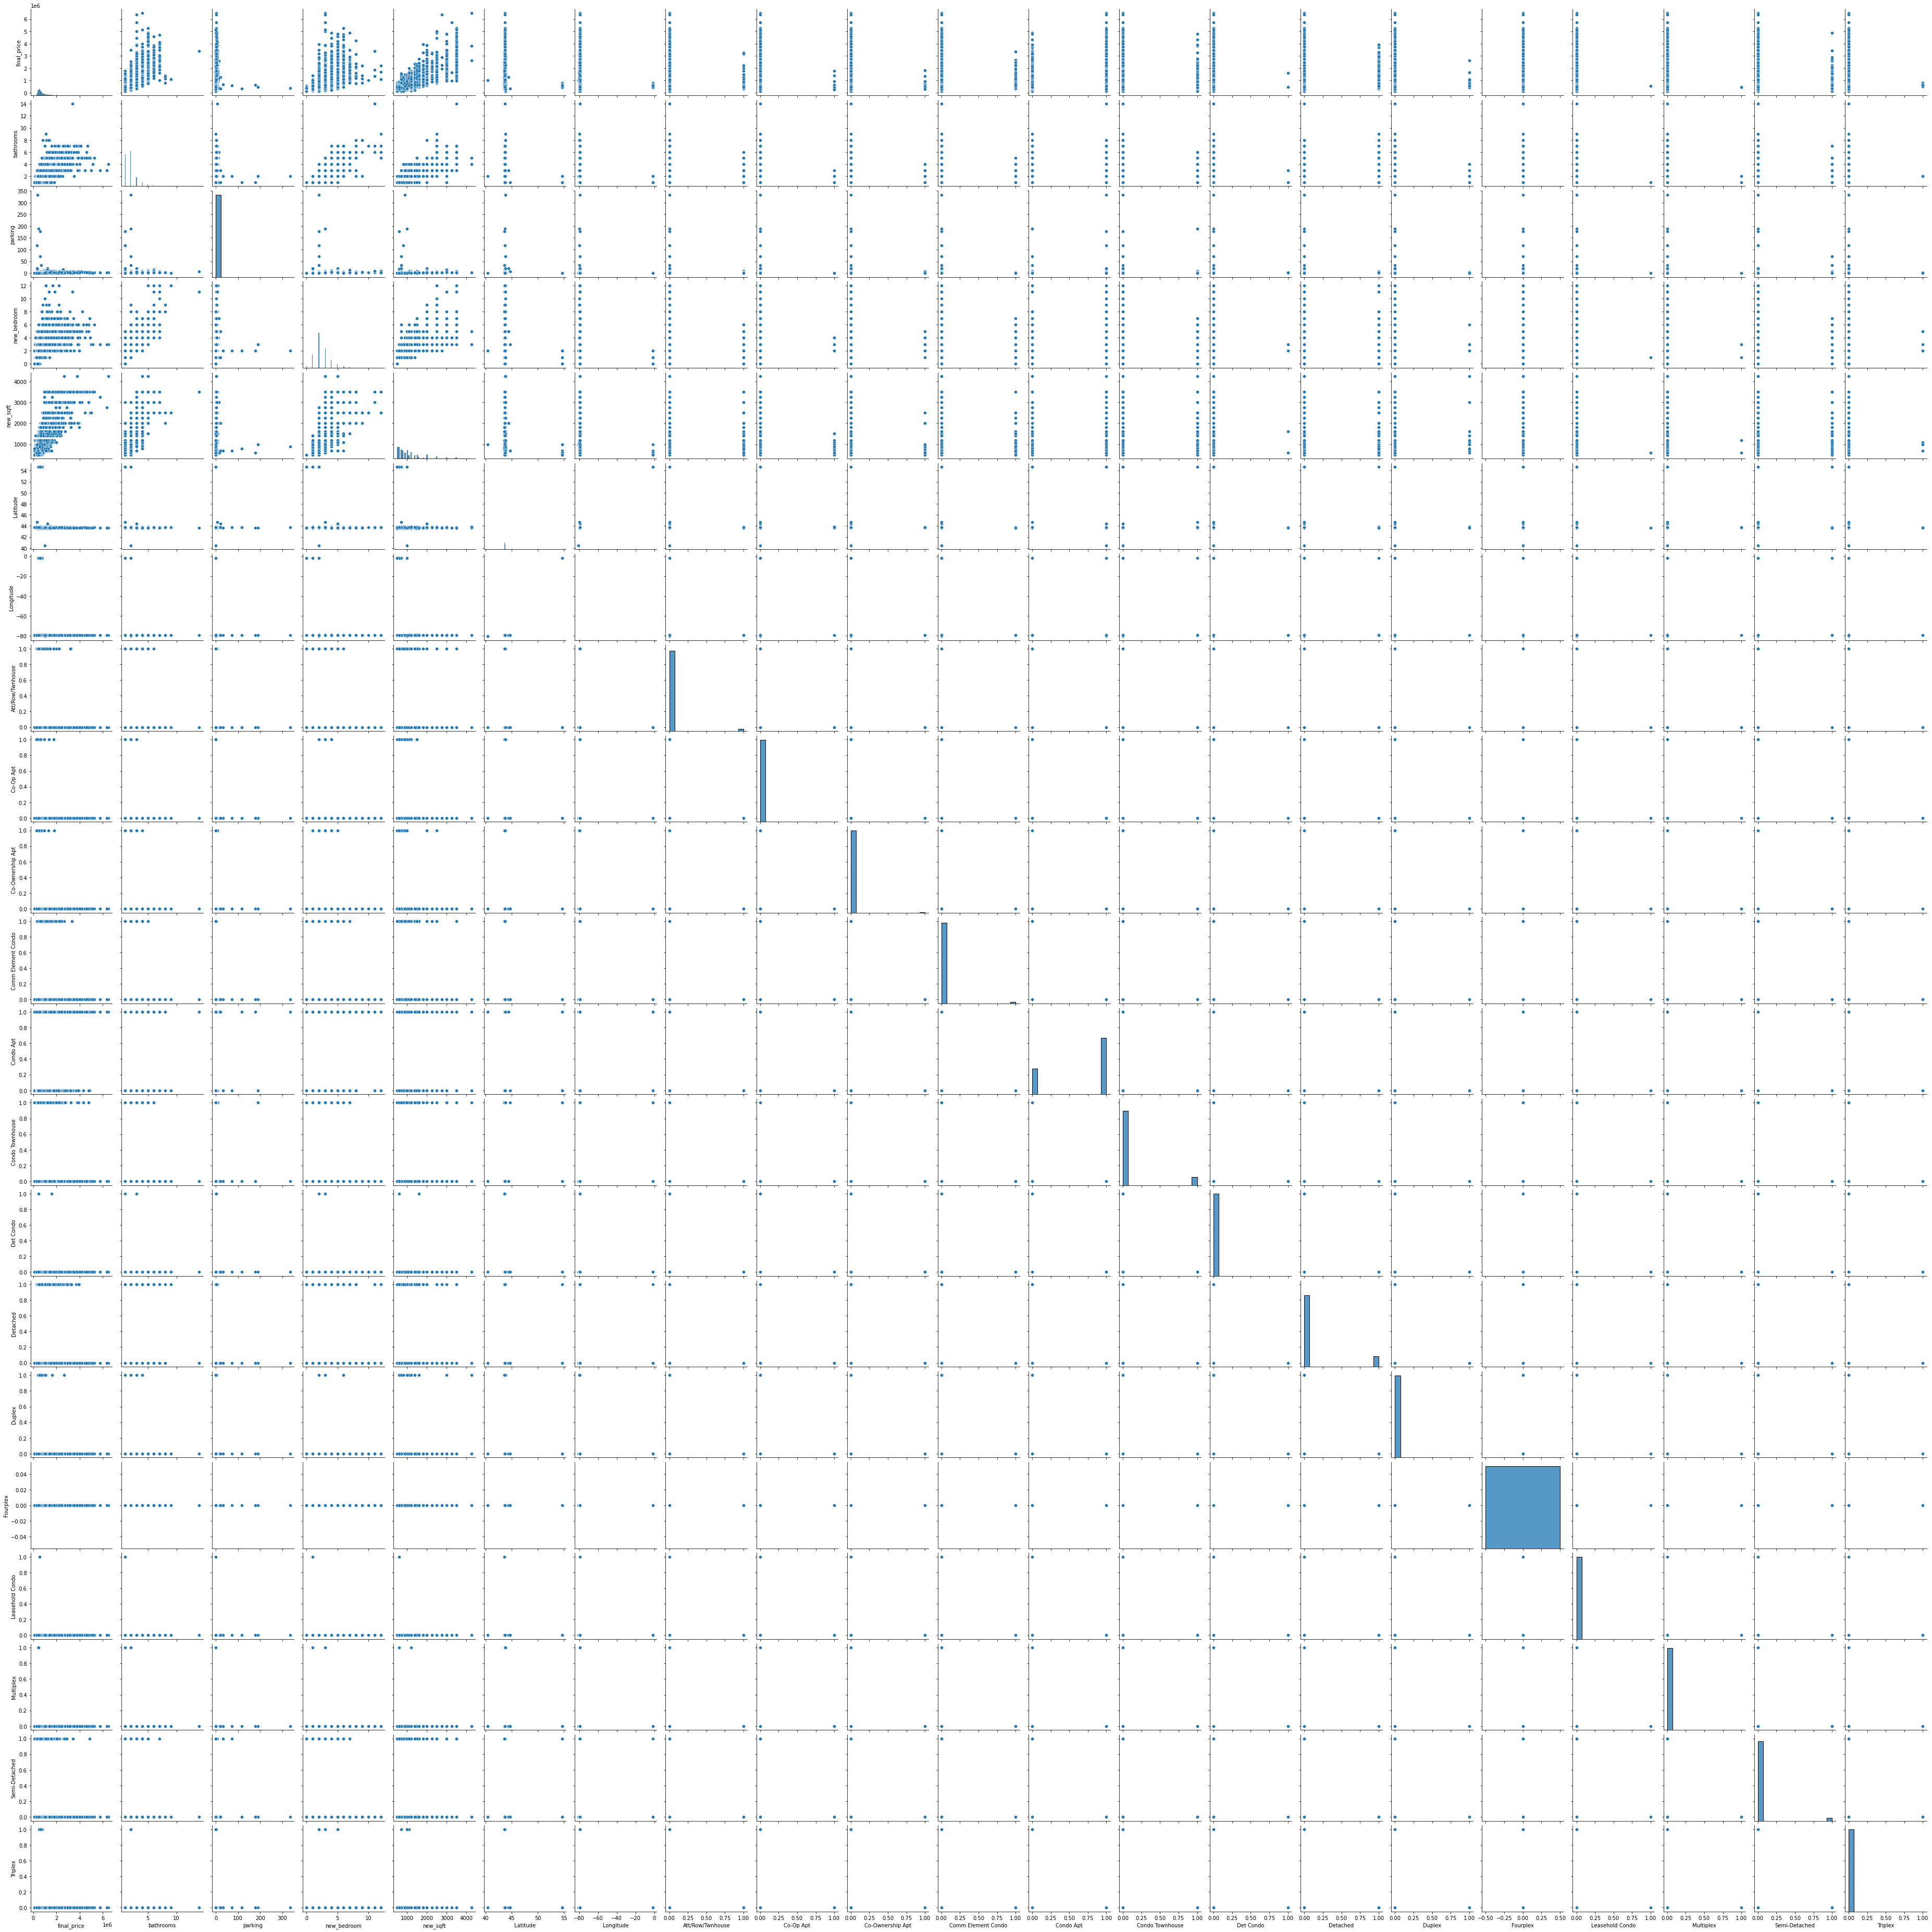

In [ ]:
sns.pairplot(datasetnew)

In [ ]:
datasetnew['description'] = datasetnew['description'].str.lower()
datasetnew['description'] = datasetnew['description'].str.strip()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

import re
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

Word cloud of description column

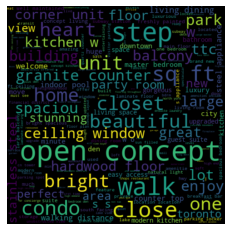

<Figure size 6480x2880 with 0 Axes>

In [ ]:
from wordcloud import WordCloud


# Create a list of word
text = " ".join(review for review in datasetnew.description.astype(str))

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.figure( figsize=(90,40))
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
vectorizer = CountVectorizer()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
datasetnew["description"] = datasetnew["description"].str.lower()
datasetnew["description"] = datasetnew["description"].str.replace('[^\w\s]','')

# Remove numbers
datasetnew["description"] = datasetnew["description"].str.replace('\d','')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words("english"))
datasetnew["description"] = datasetnew["description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
datasetnew["description"] = datasetnew["description"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
vectorizer.fit(datasetnew["description"])

# Transform the text data into a numerical matrix
T = vectorizer.transform(datasetnew["description"])

In [ ]:
print(T)

  (0, 343)	1
  (0, 1095)	1
  (0, 1597)	1
  (0, 1806)	1
  (0, 1992)	1
  (0, 2333)	1
  (0, 3027)	1
  (0, 3291)	1
  (0, 3957)	1
  (0, 3984)	1
  (0, 4248)	1
  (0, 4812)	1
  (0, 4934)	1
  (0, 5157)	1
  (0, 5323)	1
  (0, 5617)	1
  (0, 5637)	1
  (0, 6078)	1
  (0, 6142)	1
  (0, 6173)	1
  (0, 6196)	1
  (0, 6574)	1
  (0, 8011)	1
  (0, 8208)	1
  (0, 8532)	1
  :	:
  (7160, 8316)	1
  (7160, 8346)	1
  (7160, 8535)	1
  (7160, 8650)	1
  (7160, 8880)	1
  (7160, 9078)	1
  (7160, 9304)	1
  (7160, 9437)	1
  (7160, 9614)	1
  (7160, 9774)	1
  (7160, 10078)	1
  (7160, 11214)	3
  (7160, 11765)	1
  (7160, 11847)	1
  (7160, 12865)	1
  (7160, 12964)	1
  (7160, 13144)	1
  (7160, 13295)	1
  (7160, 13729)	1
  (7160, 13837)	1
  (7160, 13882)	1
  (7160, 14153)	1
  (7160, 14397)	1
  (7160, 14934)	1
  (7160, 15790)	1


Box Plot:

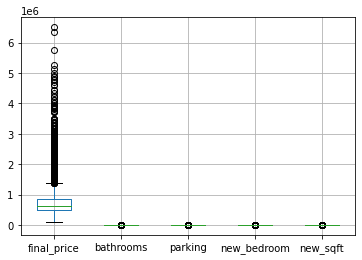

In [ ]:
np.random.seed(1234)

boxplot = datasetnew.boxplot(column=['final_price', 'bathrooms','parking','new_bedroom','new_sqft'])  


Histogram:

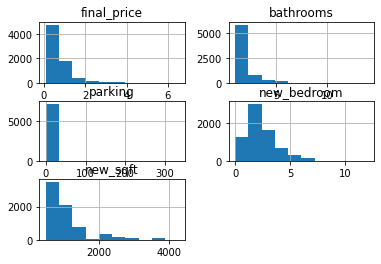

In [ ]:
hist = datasetnew.hist(column=['final_price', 'bathrooms','parking','new_bedroom','new_sqft']) 


In [ ]:
datasetnew['description'].replace('', np.nan, inplace=True)
dataset2.isnull().sum()

title            0
final_price      0
bathrooms        0
parking          0
description     22
mls              0
type             0
full_link        0
full_address    22
new_bedroom      0
new_sqft         0
Location         0
Latitude         0
Longitude        0
dtype: int64

In [ ]:
datasetnew.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
datasetnew.isnull().sum()

title                 0
final_price           0
bathrooms             0
parking               0
description           0
mls                   0
type                  0
full_link             0
full_address          0
new_bedroom           0
new_sqft              0
Location              0
Latitude              0
Longitude             0
Att/Row/Twnhouse      0
Co-Op Apt             0
Co-Ownership Apt      0
Comm Element Condo    0
Condo Apt             0
Condo Townhouse       0
Det Condo             0
Detached              0
Duplex                0
Fourplex              0
Leasehold Condo       0
Multiplex             0
Semi-Detached         0
Triplex               0
dtype: int64

# ** Modeling**

Test-train split

In [ ]:
from sklearn.model_selection import train_test_split
datasetnew.columns
datasetnew.head(5)

,title,final_price,bathrooms,parking,description,mls,type,full_link,full_address,new_bedroom,...,Condo Apt,Condo Townhouse,Det Condo,Detached,Duplex,Fourplex,Leasehold Condo,Multiplex,Semi-Detached,Triplex
0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000.0,2.0,1.0,luxurious spacious murano tower bathroom parki...,C4461599,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto",3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000.0,1.0,0.0,bright sunfilled spacious bdr unit floor ceili...,C4511330,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto",1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000.0,1.0,1.0,rare loftlike condo liberty village w ceiling ...,C4515763,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto",2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"505 - 4 Elsinore Path, Toronto (W4517121) | Zo...",368000.0,1.0,1.0,suite immaculate condo functional studio layou...,W4517121,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"4 Elsinore Path, Toronto",0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"110 Albertus Ave, Toronto (C4467843) | Zoocasa",2700000.0,5.0,2.0,gorgeous luxury custom built bdrm home prestig...,C4467843,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"110 Albertus Ave, Toronto",4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Selecting X and Y variables for Target 

In [ ]:
X = datasetnew[[ 'bathrooms', 'parking',
         'new_bedroom', 'new_sqft',
      'Latitude', 'Longitude', 'Att/Row/Twnhouse', 'Co-Op Apt',
       'Co-Ownership Apt', 'Comm Element Condo', 'Condo Apt',
       'Condo Townhouse', 'Det Condo', 'Detached', 'Duplex', 'Fourplex',
       'Leasehold Condo', 'Multiplex', 'Semi-Detached', 'Triplex']]

In [ ]:
Y = datasetnew[['final_price']]

In [ ]:
## Standardize the dataset
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()


In [ ]:
#X_std = scaler.fit_transform(X)

In [ ]:
#Y_std = scaler.fit_transform(Y)

In [ ]:
#X

Data Oints after Split of Train and Test

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape

(5012, 20)

In [ ]:
Y_train.shape

(5012, 1)

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
param_grid = {'normalize': [True, False]}

In [ ]:
lr = LinearRegression()

In [ ]:
# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]})

In [ ]:
# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'normalize': False}


In [ ]:

# Predict the values for the test set
Y_pred = grid_search.predict(X_test)

In [ ]:
# Calculate the mean squared error and mean absolute error
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

In [ ]:
# Print the results
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)






Mean squared error:  130897428543.04565
Mean absolute error:  211048.69691990592


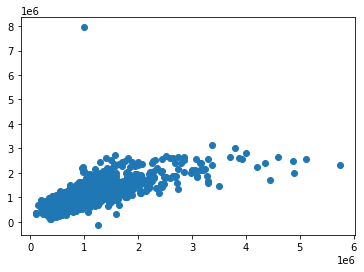

In [ ]:
plt.scatter(Y_test,reg_pred)
#Plot scatter plot for the prediction

In [ ]:
#residules (Errors)
residules = (Y_test - reg_pred)
residules

,final_price
3365,-163572.058867
1184,193075.443630
6351,179749.223921
4360,41134.805133
1563,663089.489195
...,...
5539,50893.863101
2405,15674.678483
1928,-121830.235911
3777,194415.866967


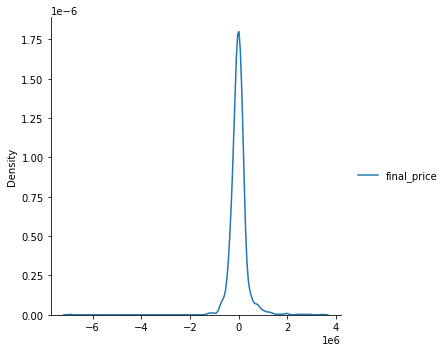

In [ ]:
sns.displot(residules,kind='kde')

As we are getting a normal distribution, We can say this modle is performing well

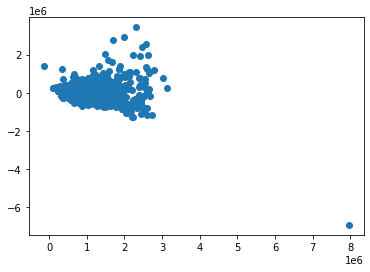

In [ ]:
plt.scatter(reg_pred,residules)
#no distribution is observed

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,reg_pred)
print(score)

0.5933814640200822


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables


In [ ]:

#display adjusted R-squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.589559861238316

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Create an instance of the SVR model
svr = SVR()

In [ ]:

# Define the hyperparameters to tune
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]}

In [ ]:
# Use GridSearchCV to perform a grid search with cross-validation
grid_search = GridSearchCV(svr, parameters, cv=5)
grid_search.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Get the best hyperparameters from the grid search
print("Best parameters:", grid_search.best_params_)

# Make predictions using the best hyperparameters
Y_pred = grid_search.predict(X_test)

Best parameters: {'C': 100, 'epsilon': 0.5, 'kernel': 'linear'}


In [ ]:
Y_test = Y_test.values.ravel()

In [ ]:
# Calculate the residual and R^2 score
residual = Y_test - Y_pred
r2 = r2_score(Y_test, Y_pred)

print("Residual:", residual)
print("R^2:", r2)

Residual: [ -48282.13895615  152928.9270752   -35428.83059277 ...  -78679.12424622
   16169.53311125 -311937.79937121]
R^2: 0.5537671962447548


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create an instance of the DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

# Define the hyperparameters to tune
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Use GridSearchCV to perform a grid search with cross-validation
grid_search = GridSearchCV(dtr, parameters, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
print("Best parameters:", grid_search.best_params_)

# Make predictions using the best hyperparameters
Y_pred = grid_search.predict(X_test)

# Calculate the residual and R^2 score
residual = Y_test - Y_pred
r2 = r2_score(Y_test, Y_pred)

print("Residual:", residual)
print("R^2:", r2)







Best parameters: {'max_depth': 8, 'min_samples_split': 9}
Residual: [-141491.86046512   38786.85869565 -107987.34666667 ...  -99668.78205128
   68640.         -114164.5       ]
R^2: 0.7803268469898296


Random forest **bold text**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Create an instance of the RandomForestRegressor model
rfr = RandomForestRegressor()

# Define the hyperparameters to tune
parameters = {'n_estimators': [10, 50, 100, 200, 300, 400, 500],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Use GridSearchCV to perform a grid search with cross-validation
grid_search = GridSearchCV(rfr, parameters, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
print("Best parameters:", grid_search.best_params_)

# Make predictions using the best hyperparameters
Y_pred = grid_search.predict(X_test)

# Calculate the residual and R^2 score
residual = Y_test - Y_pred
r2 = r2_score(Y_test, Y_pred)

print("Residual:", residual)
print("R^2:", r2)


Best parameters: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}
Residual: [-174729.97411685   78388.17685191  -54590.46845604 ... -108389.9263926
   -4850.96832503 -254213.09917234]
R^2: 0.845090695485472


# New Section

**KNN **

In [ ]:
#from sklearn import svm

#svm.SVC(kernel='linear', gamma = 'auto',C=2)
#classifire_svm = svm.SVC(kernel='linear', gamma = 'auto',C=2)
#classifire_svm.fit(X_train,Y_train)

from sklearn.neighbors import KNeighborsClassifier

classifire_KNN = KNeighborsClassifier(n_neighbors=2)
classifire_KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_pred = classifire_KNN.predict(X_test)
knn_pred

array([ 741500.,  490000.,  485000., ...,  545000.,  835000., 1001000.])

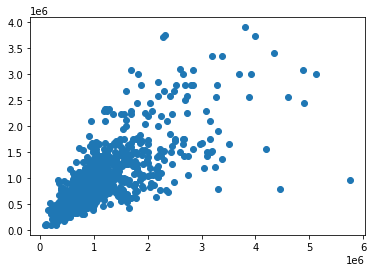

In [ ]:
plt.scatter(Y_test,knn_pred)

In [ ]:
from sklearn.metrics import r2_score
score_knn = r2_score(Y_test,knn_pred)
print(score_knn)

0.6104040711205636


**XGB**

In [ ]:

#from xgboost import XGBClassifier

# fit model no training data
#model = XGBClassifier()
#xg_pred=model.fit(X_train, Y_train)

In [ ]:
#xg_pr = xg_pred.predict(X_test)
#xg_pr

In [ ]:
#plt.scatter(Y_test,xg_pr)

In [ ]:
#from sklearn.metrics import r2_score
#score_xg = r2_score(Y_test,xg_pr)
#print(score_xg)

In [ ]:
print(X.shape)

(7161, 20)


[ 'bathrooms', 'parking',
         'new_bedroom', 'new_sqft',
      'Latitude', 'Longitude', 'Att/Row/Twnhouse', 'Co-Op Apt',
       'Co-Ownership Apt', 'Comm Element Condo', 'Condo Apt',
       'Condo Townhouse', 'Det Condo', 'Detached', 'Duplex', 'Fourplex',
       'Leasehold Condo', 'Multiplex', 'Semi-Detached', 'Triplex']

In [ ]:
feature_values = np.array([[1, 4, 3, 2500, 43.564230, -79.650760, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,1,0]])

# Make a prediction using the model
prediction = grid_search.predict(feature_values)

# Print the prediction
print(int(prediction[0]))

1234301


In [ ]:
import pickle

In [ ]:
filename = 'random_forest_model.pkl'
pickle.dump(grid_search, open(filename, 'wb'))

In [ ]:
pickled_model=pickle.load(open(filename,'rb'))

In [ ]:
pickled_model.predict(feature_values)

array([1234301.50127882])